In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.model_selection import train_test_split
from itertools import chain

In [2]:
zomato = pd.read_csv("zomato.csv")
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

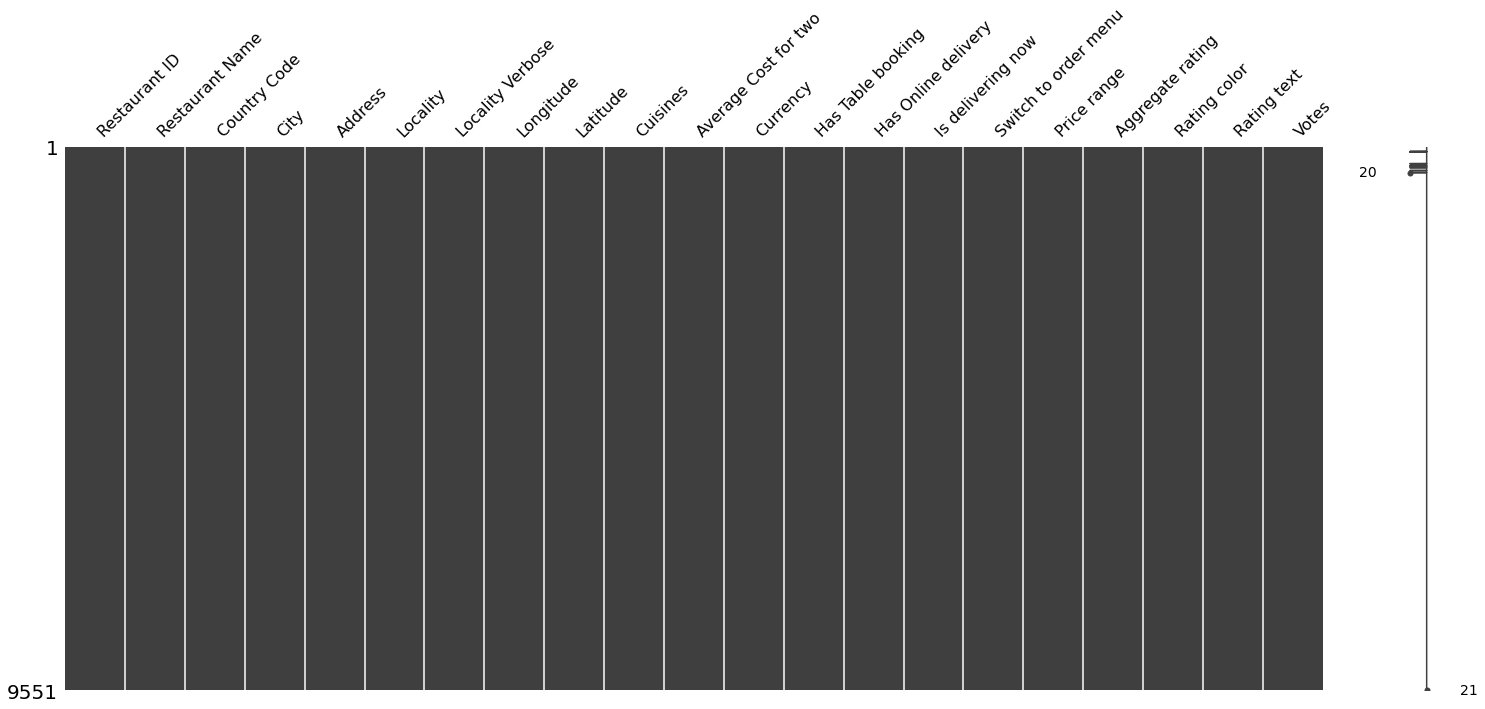

In [5]:
msno.matrix(zomato)

In [6]:
zomato.duplicated().sum()

0

In [7]:
zomato.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
zomato = zomato.rename(columns={'Average Cost for two':'cost','Has Table booking':'Table booking','Has Online delivery':'Oneline delivery'})

In [10]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Table booking,Oneline delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
zomato.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
cost                     140
Currency                  12
Table booking              2
Oneline delivery           2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [12]:
zomato['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [13]:
zomato['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [14]:
zomato['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [15]:
zomato['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [16]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  cost                  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Table booking         9551 non-null   object 
 13  Oneline delivery      9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]


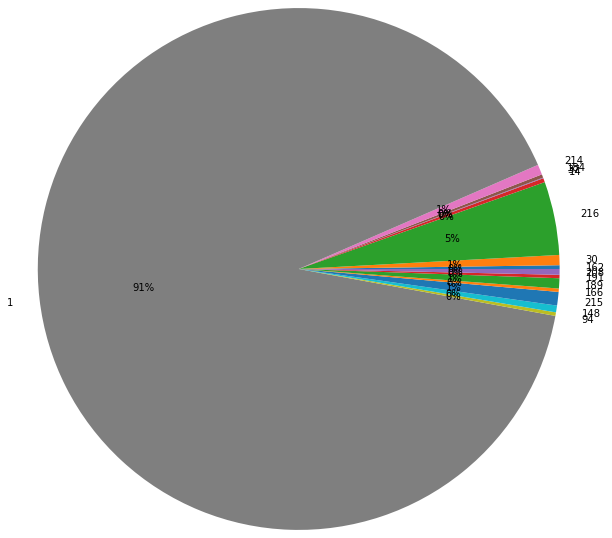

In [17]:
Countries = zomato['Country Code'].unique()
print(Countries)
dataCount = []
for Ccode in Countries:
    cdata = zomato[zomato['Country Code']==Ccode]
    count = cdata['Country Code'].count()
    dataCount.append(count)
plt.pie(dataCount, labels = Countries, autopct='%.0f%%', radius=3)
plt.show()

In [18]:
#Country code 1 has 91% data, so we will analysis the data for country code 1
zomato_india = zomato[zomato['Country Code']==1]
zomato_india_vis = zomato_india.copy()
zomato_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Table booking,Oneline delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [19]:
zomato_india.nunique()

Restaurant ID           8652
Restaurant Name         6604
Country Code               1
City                      43
Address                 8025
Locality                 784
Locality Verbose         841
Longitude               7230
Latitude                7790
Cuisines                1392
cost                      79
Currency                   1
Table booking              2
Oneline delivery           2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                    871
dtype: int64

In [20]:
#Check if null value available on any of the column
zomato_india.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
cost                    0
Currency                0
Table booking           0
Oneline delivery        0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Data Visualization 

#### Restaurant Count in City

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location wise count for restaurants')

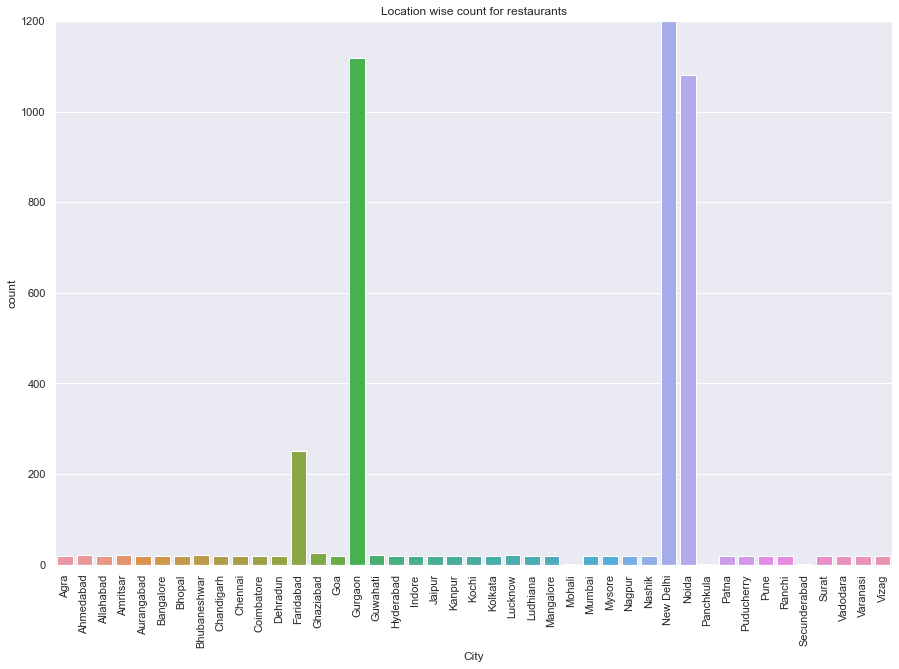

In [21]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize=(15,10))
chart = sns.countplot(zomato_india_vis['City'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90, ha='center')
chart.set(ylim=(0,1200))
plt.title('Location wise count for restaurants')

#### Avarage dining cost for per person in City

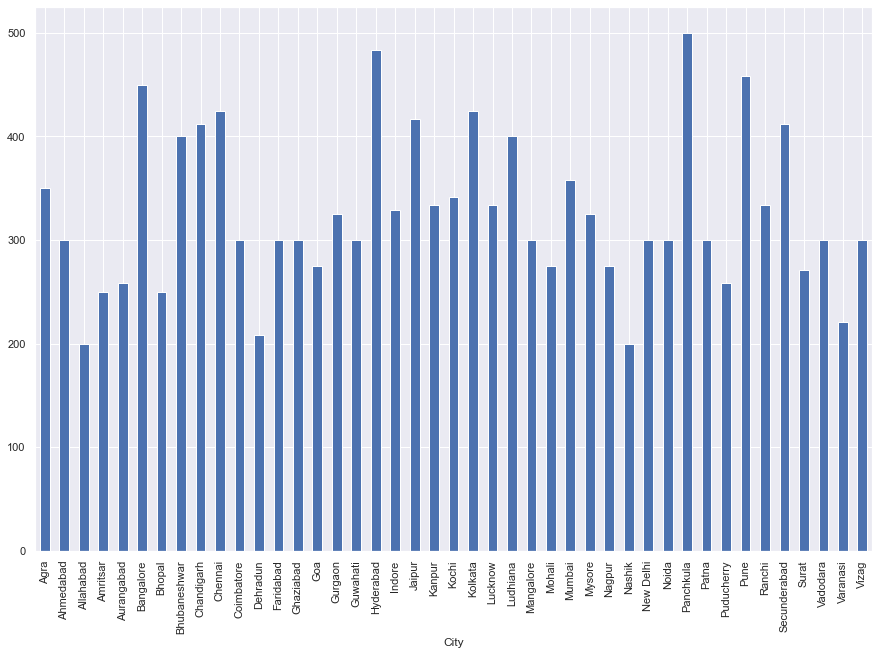

In [22]:
#Fill the zero cost restaurant with the Median amount city wise.
zero_cost_city=zomato_india_vis['City'][zomato_india_vis['cost']==0].unique()
for city in zero_cost_city:
    zomato_india_vis.loc[(zomato_india_vis['cost']==0) & (zomato_india_vis['City']==city),'cost'] = zomato_india_vis[zomato_india_vis['City']==city]['cost'].median()

zomato_india_vis['Avarage cost'] = zomato_india_vis['cost']/zomato_india_vis['Price range']    
city_cost = zomato_india_vis[zomato_india_vis['cost']!=0].groupby(['City'])['Avarage cost'].median()

# Visualize in bar chart.
fig,ax = plt.subplots(figsize=(15,10))
city_cost.plot.bar(city_cost)   

#### Avarage cost, if table booking available

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

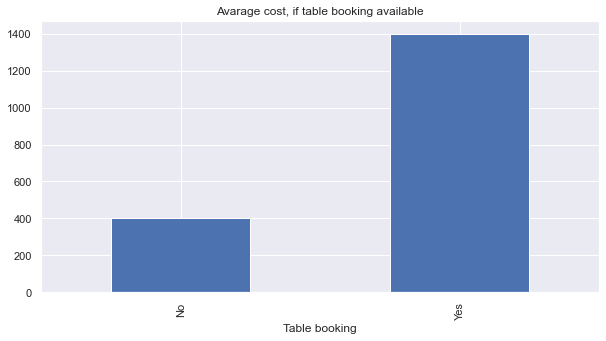

In [23]:
fig,ax = plt.subplots(figsize=(10,5))
table_booking_amt = zomato_india.groupby(['Table booking'])['cost'].median()
table_booking_amt.plot.bar(table_booking_amt) #.title('Avarage cost, if table booking available')
plt.title("Avarage cost, if table booking available")
plt.xticks(rotation=90)

#### Avarage cost, if online order option available in restuarant

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

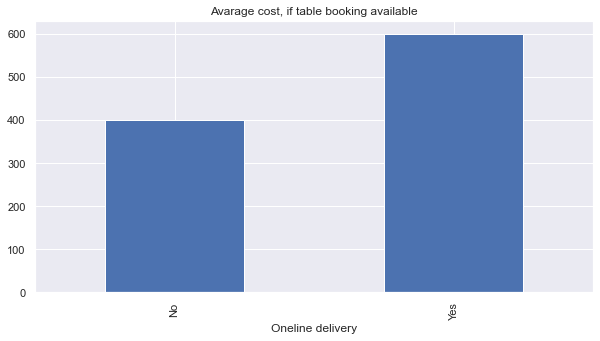

In [24]:
fig,ax = plt.subplots(figsize=(10,5))
online_booking_amt = zomato_india.groupby(['Oneline delivery'])['cost'].median()
online_booking_amt.plot.bar(online_booking_amt) #.title('Avarage cost, if table booking available')
plt.title("Avarage cost, if table booking available")
plt.xticks(rotation=90)

#### City wise Avarage rating 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

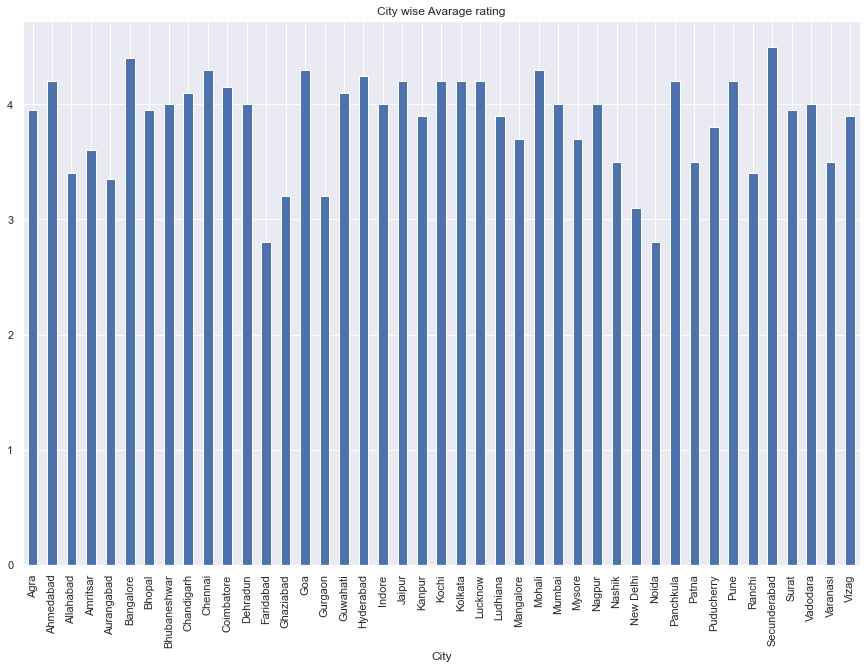

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ava_city_rat = zomato_india_vis.groupby(zomato_india_vis['City'])['Aggregate rating'].median()
ava_city_rat.plot.bar(ava_city_rat) #.title('Avarage cost, if table booking available')
plt.title("City wise Avarage rating")
plt.xticks(rotation=90)

#### Rating vs Cost for Per Person

Text(0.5, 1.0, 'Rating vs Avg. Cost for One')

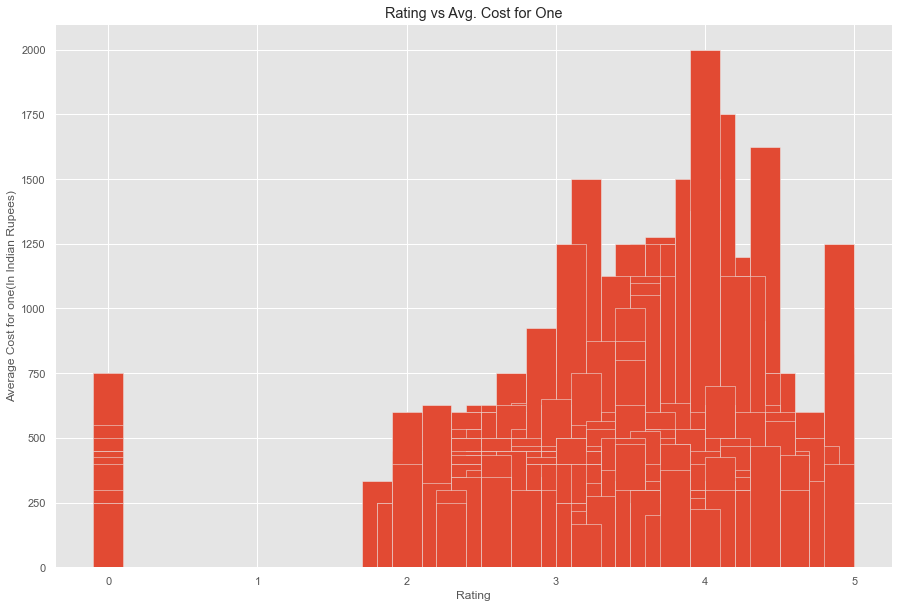

In [26]:
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(15,10))
x = zomato_india_vis['Aggregate rating']
y = zomato_india_vis['Avarage cost']
plt.bar(x,y,width = 0.2)
plt.xlabel('Rating')
plt.ylabel('Average Cost for one(In Indian Rupees)')
plt.title('Rating vs Avg. Cost for One')

#### Rating vs No of Votes

Text(0.5, 1.0, 'Rating vs No of Votes')

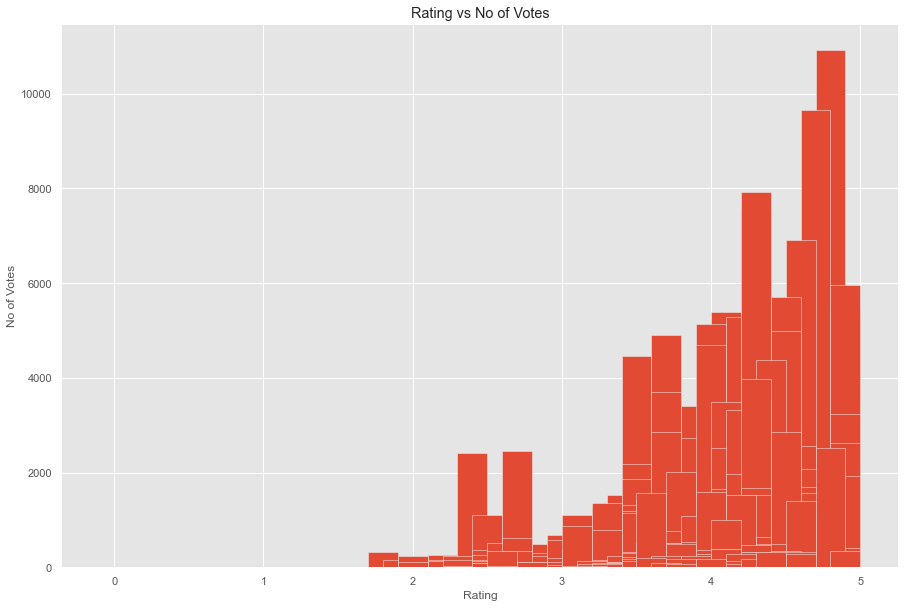

In [27]:
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(15,10))
x = zomato_india_vis['Aggregate rating']
y = zomato_india_vis['Votes']
plt.bar(x,y,width = 0.2)
plt.xlabel('Rating')
plt.ylabel('No of Votes')
plt.title('Rating vs No of Votes')

In [28]:
from functools import reduce
Cuisines_Data = [str(cuis).split(",") for cuis in zomato_india_vis['Cuisines']]
Cuisines_Data = list(set(str(j).strip() for j in reduce(lambda z,y : z+y,Cuisines_Data)))
Cuisines_Data

['Mithai',
 'Iranian',
 'Thai',
 'Burger',
 'Fast Food',
 'Goan',
 'German',
 'Continental',
 'Tex-Mex',
 'Korean',
 'Malaysian',
 'Vietnamese',
 'Tibetan',
 'Sri Lankan',
 'Steak',
 'Charcoal Grill',
 'Armenian',
 'Sushi',
 'Bakery',
 'Cafe',
 'Moroccan',
 'Sandwich',
 'Street Food',
 'Turkish',
 'Kashmiri',
 'Hyderabadi',
 'Belgian',
 'Chettinad',
 'Indonesian',
 'Nepalese',
 'French',
 'Greek',
 'Biryani',
 'BBQ',
 'Italian',
 'Burmese',
 'Salad',
 'Juices',
 'Rajasthani',
 'Portuguese',
 'Persian',
 'European',
 'Gujarati',
 'Finger Food',
 'Desserts',
 'Naga',
 'Cuisine Varies',
 'Cajun',
 'Assamese',
 'Deli',
 'Modern Indian',
 'Pizza',
 'Drinks Only',
 'Lebanese',
 'Raw Meats',
 'Oriya',
 'Asian',
 'Tea',
 'Ice Cream',
 'Awadhi',
 'Japanese',
 'Mediterranean',
 'Healthy Food',
 'Mangalorean',
 'Maharashtrian',
 'Seafood',
 'Beverages',
 'American',
 'Middle Eastern',
 'Mexican',
 'Parsi',
 'South American',
 'Bihari',
 'Indian',
 'Kerala',
 'Chinese',
 'Afghani',
 'African',
 'A

## Data cleanup and encoding.

In [29]:
zomato_india['Rating text'].unique()

array(['Good', 'Very Good', 'Average', 'Excellent', 'Not rated', 'Poor'],
      dtype=object)

In [30]:
cleanup = {'Currency':{'Indian Rupees(Rs.)':1},'Table booking':{'Yes':1,'No':0},'Oneline delivery':{'Yes':1,'No':0},
          'Is delivering now':{'Yes':1,'No':0}, 'Switch to order menu':{'No':0}, 'Rating color':{'Yellow':5,'Green':4,
            'Orange':3,'Dark Green':2,'White':1,'Red':0}, 'Rating text':{'Good':3,'Very Good':4,'Average':2,
            'Excellent':5, 'Poor':1, 'Not rated':0}}
zomato_india.replace(cleanup, inplace=True)
zomato_india.head()

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Table booking,Oneline delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,1,0,0,0,0,3,3.9,5,3,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,1,0,0,0,0,2,3.5,5,3,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,1,0,0,0,0,2,3.6,5,3,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,1,0,0,0,0,2,4.0,4,4,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,1,0,0,0,0,3,4.2,4,4,177


In [31]:
# Encode the inpute variables
zomato_obj_col = zomato_india.select_dtypes(include=np.object).columns.tolist()
zomato_obj_col = ['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Longitude',
 'Latitude']

for col in zomato_obj_col:
    zomato_india[col] = zomato_india[col].factorize()[0]

zomato_india.head()    

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Table booking,Oneline delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,3,3.9,5,3,140
625,3400341,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,2,3.5,5,3,71
626,3400005,2,1,0,2,0,0,2,2,1,...,1,0,0,0,0,2,3.6,5,3,94
627,3400021,3,1,0,3,1,1,3,3,2,...,1,0,0,0,0,2,4.0,4,4,87
628,3400017,4,1,0,4,1,1,4,4,3,...,1,0,0,0,0,3,4.2,4,4,177


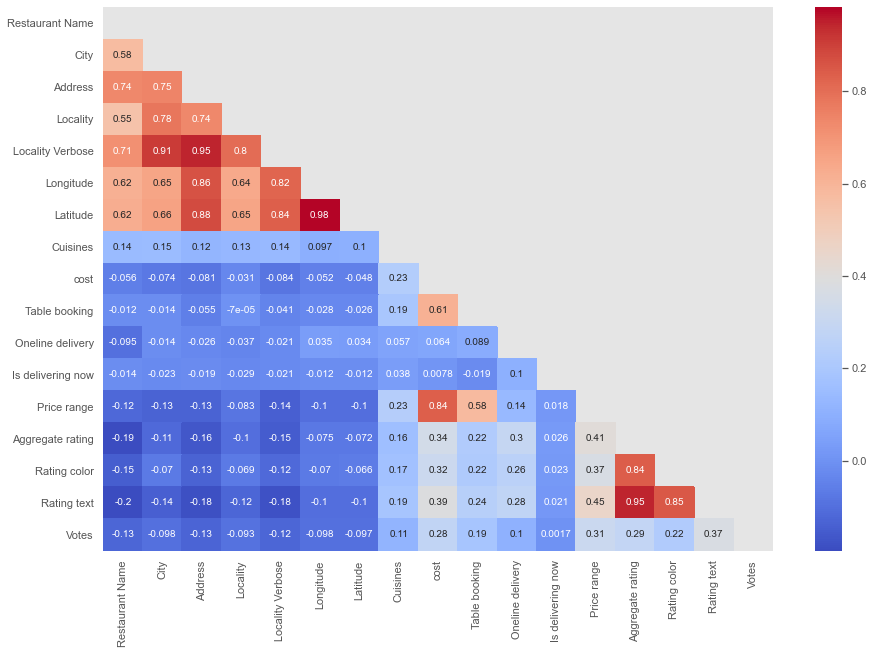

In [32]:
zomato_col = ['Restaurant Name', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'cost', 'Table booking', 'Oneline delivery',
       'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
CorrMat = zomato_india[zomato_col].corr()
#print(CorrMat)
fig,ax = plt.subplots(figsize=(15,10))
mask = np.zeros(CorrMat.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(CorrMat, annot=True,ax=ax, cmap='coolwarm', mask=mask)

## Regression Analysis

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [40]:
model_col = ['City', 'Longitude', 'Latitude', 'Cuisines',
       'cost', 'Table booking', 'Oneline delivery',
       'Is delivering now',
       'Aggregate rating', 'Rating color', 'Votes']

In [47]:
#Train Test split
x = zomato_india[['City', 'Longitude', 'Latitude', 'Cuisines',
       'cost', 'Table booking', 'Oneline delivery',
       'Is delivering now',
       'Rating color', 'Votes']]
y = zomato_india['Aggregate rating']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print('Training dataset shape :',X_train.shape)
print('Test dataset shape :',X_test.shape)

Training dataset shape : (6489, 10)
Test dataset shape : (2163, 10)


#### Linear Regression

In [48]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.7391982498718699

#### Decision Tree Regression

In [51]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_pred = DTree.predict(x_test)
r2_score(y_test,y_pred)

0.9746160420213826

#### Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_pred = RForest.predict(x_test)
r2_score(y_test,y_pred)

0.9861313092295113

#### Extra Tree Regression

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
ExTree = ExtraTreesRegressor(n_estimators = 100)
ExTree.fit(x_train,y_train)
y_pred = ExTree.predict(x_test)
r2_score(y_test,y_pred)

0.9854481646548554

#### Save the model - As we got best accuracy through Random Forest Regression, we would save Random Forest Model

In [64]:
import pickle
pickle.dump(RForest,open('zomato_india_model.pkl','wb'))